<a href="https://colab.research.google.com/github/Dimildizio/raguelike/blob/main/research/RMBG_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kornia

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from transformers import AutoModelForImageSegmentation

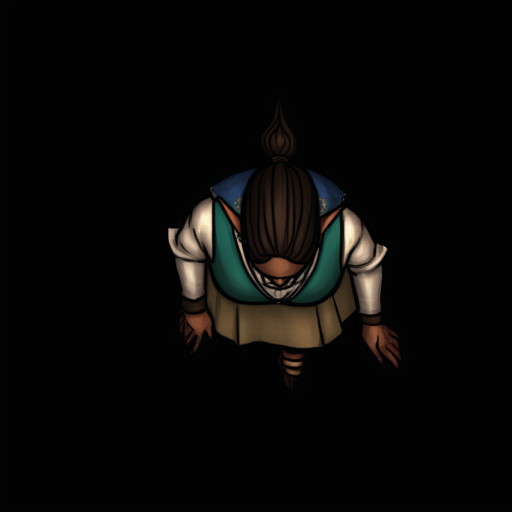

In [12]:
model_id = 'briaai/RMBG-2.0'
img = Image.open('villager_elf.png')
image_size = (512, 512)

transform_image = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

input_images = transform_image(img).unsqueeze(0).to('cuda')

In [5]:
model = AutoModelForImageSegmentation.from_pretrained(model_id, trust_remote_code=True)
torch.set_float32_matmul_precision(['high', 'highest'][0])
model.to('cuda')
model.eval()
print()

/usr/local/lib/python3.11/dist-packages/timm/models/layers/__init__.py:48: FutureWarning: Importing from timm.models.layers is deprecated, please import via timm.layers
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.layers", FutureWarning)
/usr/local/lib/python3.11/dist-packages/timm/models/registry.py:4: FutureWarning: Importing from timm.models.registry is deprecated, please import via timm.models
  warnings.warn(f"Importing from {__name__} is deprecated, please import via timm.models", FutureWarning)


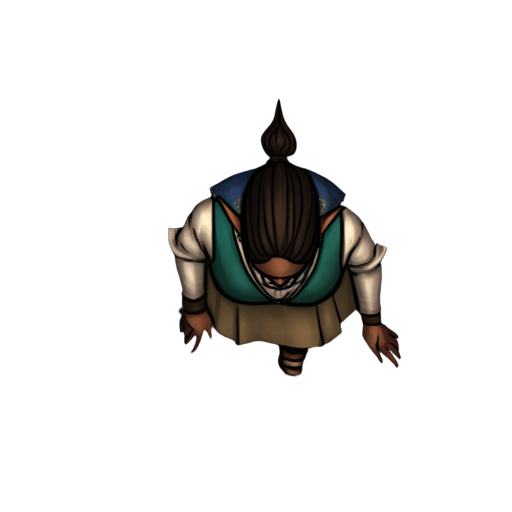

In [14]:
with torch.no_grad():
    pred = model(input_images)[-1].sigmoid().cpu()[0].squeeze()


pred_pil = transforms.ToPILImage()(pred)
mask = pred_pil.resize(img.size)
img.putalpha(mask)


img.save("villager_elf_nobg.png")
img.resize((512,512))

In [15]:
!nvidia-smi

Mon Feb 17 19:15:06 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   61C    P0             28W /   70W |    4506MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----